In [42]:
# импорт нужных библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter

In [43]:
# сразу напишем код функции, которая будет вычислять все нужные метрики

def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

In [44]:
dtf = pd.read_csv('Sleep_Efficiency.csv')
dtf = dtf.drop(['ID', 'Bedtime', 'Wakeup time'], axis=1)

label_enc = LabelEncoder()
dtf['Gender'] = label_enc.fit_transform(dtf['Gender'])
dtf['Smoking status'] = label_enc.fit_transform(dtf['Smoking status'])
dtf.dropna()

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,0,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,69,1,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
2,40,0,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,40,0,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0
4,57,1,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
445,30,0,7.5,0.53,28,20,52,4.0,50.0,2.0,1,1.0
447,27,0,7.5,0.91,22,57,21,0.0,0.0,0.0,0,5.0
448,52,1,6.0,0.74,28,57,15,4.0,25.0,0.0,0,3.0
450,45,1,7.0,0.76,18,72,10,3.0,0.0,0.0,0,3.0


In [45]:
# смотрим описание датасета

print(dtf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    int64  
 1   Gender                  452 non-null    int64  
 2   Sleep duration          452 non-null    float64
 3   Sleep efficiency        452 non-null    float64
 4   REM sleep percentage    452 non-null    int64  
 5   Deep sleep percentage   452 non-null    int64  
 6   Light sleep percentage  452 non-null    int64  
 7   Awakenings              432 non-null    float64
 8   Caffeine consumption    427 non-null    float64
 9   Alcohol consumption     438 non-null    float64
 10  Smoking status          452 non-null    int64  
 11  Exercise frequency      446 non-null    float64
dtypes: float64(6), int64(6)
memory usage: 42.5 KB
None


In [46]:
# выведем названия фич
dtf.columns

Index(['Age', 'Gender', 'Sleep duration', 'Sleep efficiency',
       'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

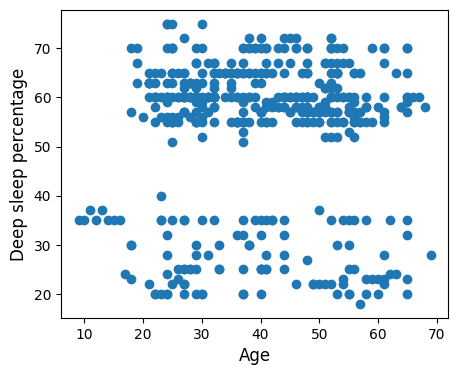

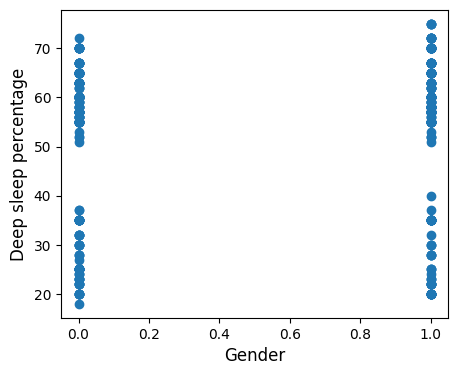

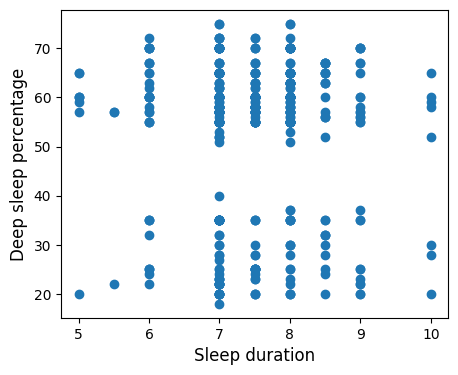

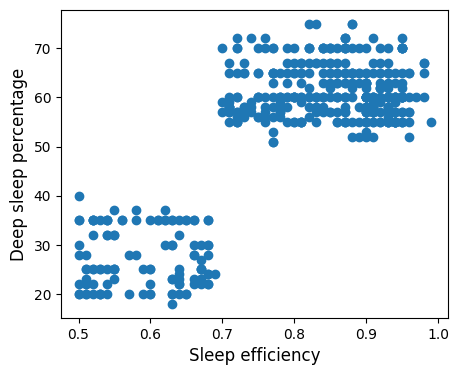

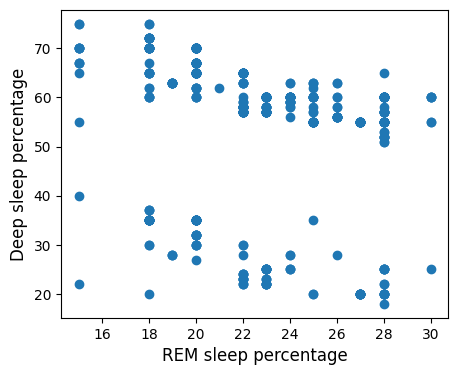

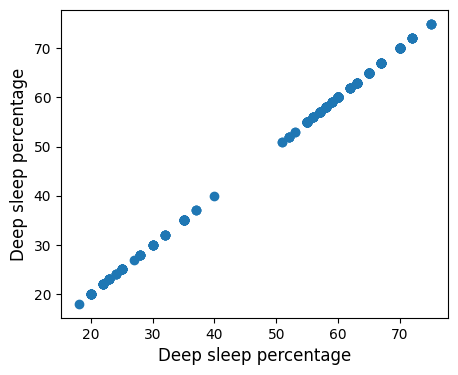

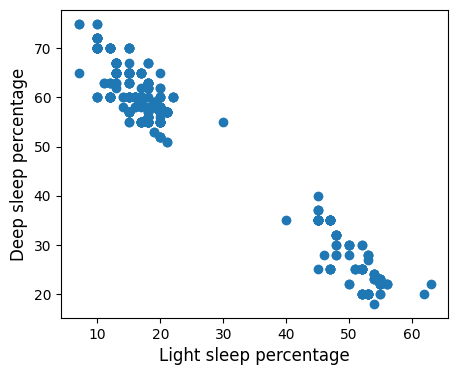

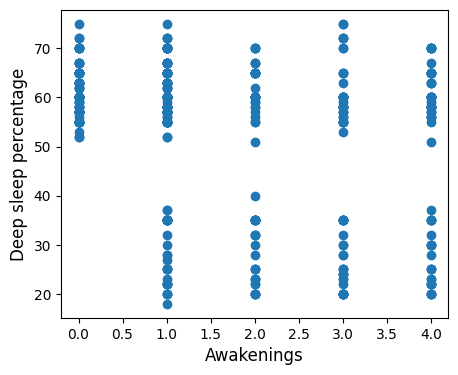

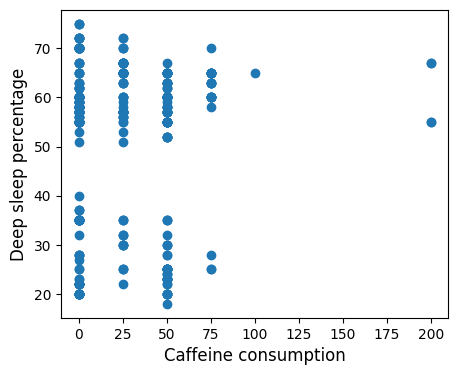

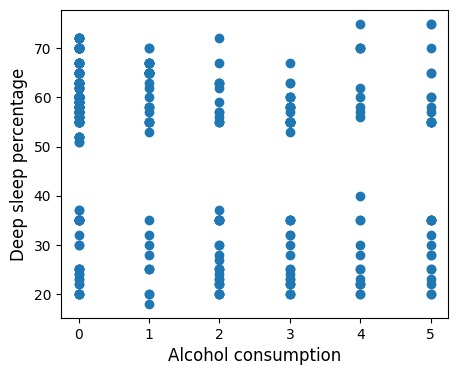

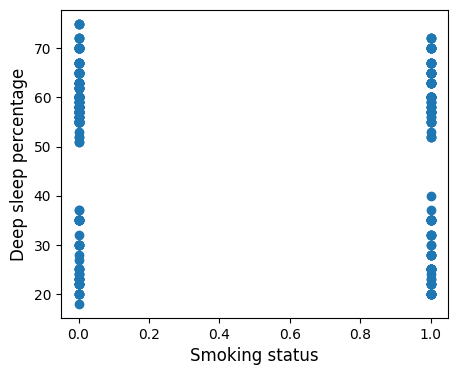

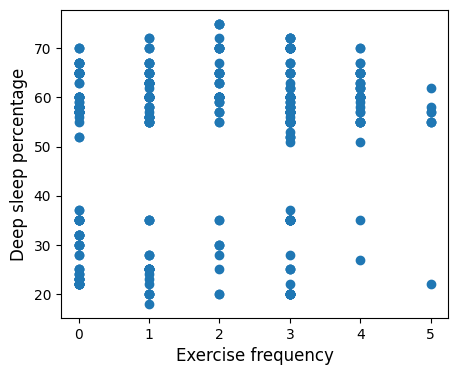

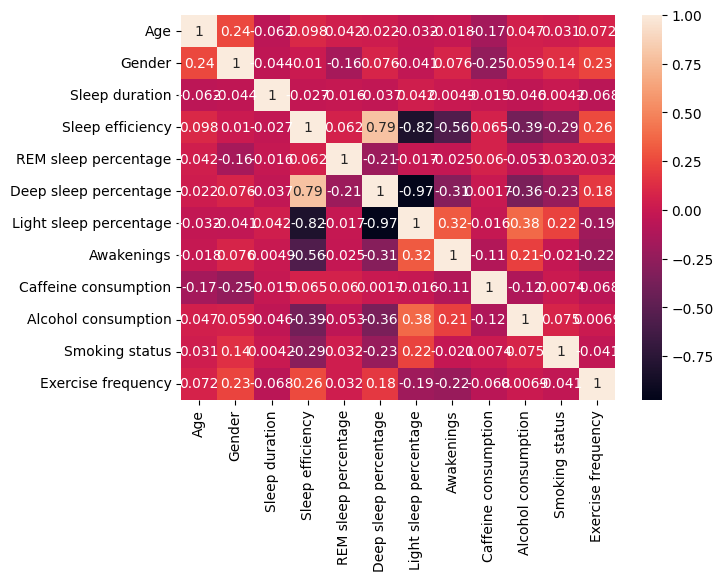

In [47]:
# нарисуем диаграммы рассеяния, чтобы лучше понять, как признаки (фичи) связаны с целевой переменной

for index, feature_name in enumerate(dtf.columns):
    plt.figure(figsize=(5, 4))
    plt.scatter(dtf[feature_name], dtf['Deep sleep percentage'])  # Замените 'disease' на имя вашего целевого столбца
    plt.ylabel('Deep sleep percentage', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

# корреляция
plt.figure(figsize=(7,5))
sns.heatmap(dtf.corr(numeric_only = True), annot=True)
plt.show()

In [48]:
# подготавливаем датасет к обучению
# заполняем пустые значения

dtf['Smoking status'].fillna(dtf['Smoking status'].mode()[0], inplace=True)
dtf['Gender'].fillna(dtf['Gender'].mode()[0], inplace=True)

dtf['Age'].fillna(dtf['Age'].mean(), inplace=True)
dtf['Sleep duration'].fillna(dtf['Sleep duration'].mean(), inplace=True)
dtf['Sleep efficiency'].fillna(dtf['Sleep efficiency'].mean(), inplace=True)
dtf['REM sleep percentage'].fillna(dtf['REM sleep percentage'].mean(), inplace=True)
dtf['Deep sleep percentage'].fillna(dtf['Deep sleep percentage'].mean(), inplace=True)
dtf['Light sleep percentage'].fillna(dtf['Light sleep percentage'].mean(), inplace=True)
dtf['Awakenings'].fillna(dtf['Awakenings'].mean(), inplace=True)
dtf['Caffeine consumption'].fillna(dtf['Caffeine consumption'].mean(), inplace=True)
dtf['Alcohol consumption'].fillna(dtf['Alcohol consumption'].mean(), inplace=True)
dtf['Exercise frequency'].fillna(dtf['Exercise frequency'].mean(), inplace=True)

# убираем otliers

for column in dtf.columns:
    Q1 = dtf[column].quantile(0.25)
    Q3 = dtf[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    dtf = dtf[(dtf[column] >= lower_bound) & (dtf[column] <= upper_bound)]

# разделяем датасет

X = dtf.drop(['Deep sleep percentage'], axis=1)
y = dtf['Deep sleep percentage']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

scaler = StandardScaler()

# создаем список категориальных колонок (которые не нужно нормализовать)
categorical_columns = ['Smoking status', 'Gender']

# нормализуем только числовые столбцы (включая столбцы, не являющиеся категориальными)
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns.difference(categorical_columns)

# применяем нормализацию только к числовым данным, исключая категориальные
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

X shape: (270, 11) | y shape: (270,) 


In [49]:
# делим датасет на трейн и тест

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [50]:
# линейная регрессия
from sklearn.linear_model import LinearRegression

# Create a linear regression modelы
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(X_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)

In [51]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)


RMSE:  0.0
  R2: 1.0
 Adjusted R2: 1.0
 Cross Validated R2: 1.0


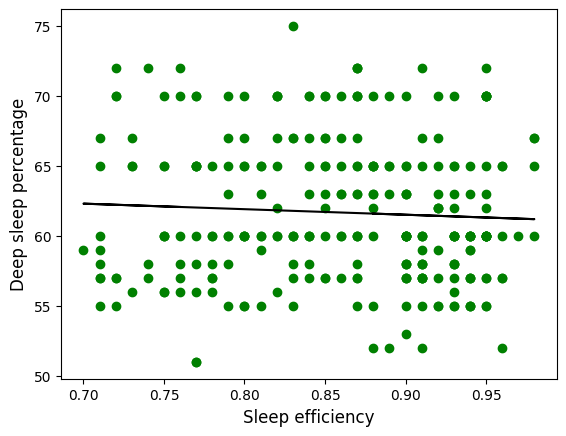

In [52]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = dtf['Sleep efficiency'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Deep sleep percentage'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Deep sleep percentage', size=12)
plt.xlabel('Sleep efficiency', size=12)
plt.show()



In [53]:
# полиномиальная регрессия
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [54]:
# Create a linear regression model
modelPR = LinearRegression()

# Fit the model to the data
modelPR.fit(X_p_train, y_p_train)

# Predict the response for a new data point
y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  1.8316
  R2: 0.8836
 Adjusted R2: 1.0329
 Cross Validated R2: 0.3715


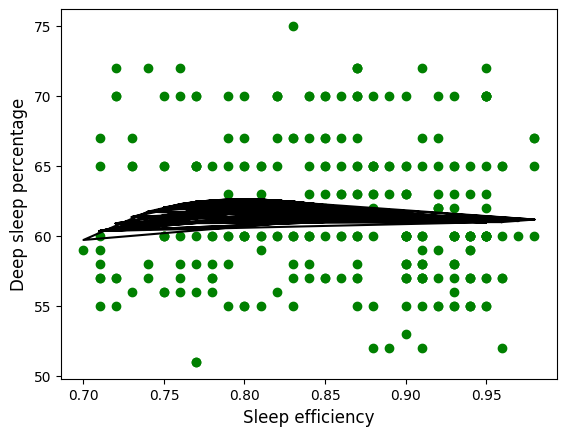

In [55]:
X2 = dtf['Sleep efficiency'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dtf['Deep sleep percentage'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)


plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Deep sleep percentage', size=12)
plt.xlabel('Sleep efficiency', size=12)
plt.show()


In [56]:
# дерево принятия решений
from sklearn.tree import DecisionTreeRegressor

# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)

In [57]:
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  0.5092
  R2: 0.9905
 Adjusted R2: 0.988
 Cross Validated R2: 0.9532


In [58]:
# случайный лес
from sklearn.ensemble import RandomForestRegressor

# Create a stepwise regression model
modelRF = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
modelRF.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelRF.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.5711
  R2: 0.988
 Adjusted R2: 0.9849
 Cross Validated R2: 0.9551


In [59]:
# опорные вектора с линейным ядром
from sklearn.svm import SVR

# Create a support vector regression model
modelSVR = SVR(kernel='linear')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.0602
  R2: 0.9999
 Adjusted R2: 0.9998
 Cross Validated R2: 0.9999


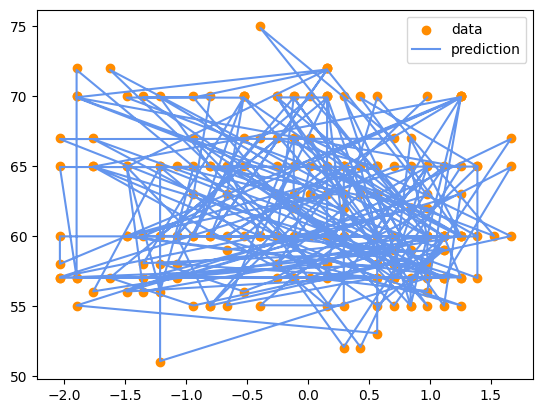

In [60]:
plt.scatter(X_train["Sleep efficiency"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Sleep efficiency"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [61]:
# опорные вектора с полиномиальным ядром
from sklearn.svm import SVR

# Create a support vector regression model. Полиномиальное ядро
modelSVR = SVR(kernel='poly')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  1.9048
  R2: 0.8669
 Adjusted R2: 0.8321
 Cross Validated R2: 0.8304


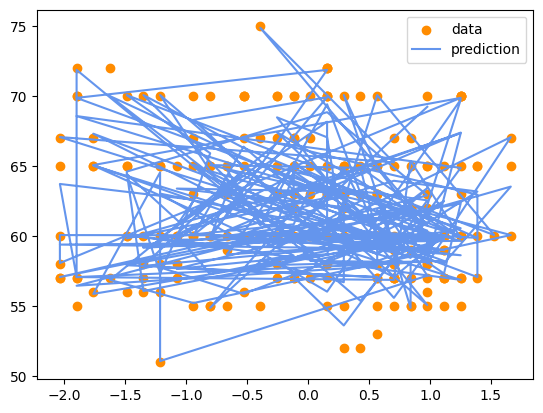

In [62]:
plt.scatter(X_train["Sleep efficiency"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Sleep efficiency"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [63]:
# опорные вектора, где ядро - радиальная базисная функция
modelSVR = SVR(kernel='rbf')

modelSVR.fit(X_train, y_train)

y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  1.5277
  R2: 0.9144
 Adjusted R2: 0.892
 Cross Validated R2: 0.8799


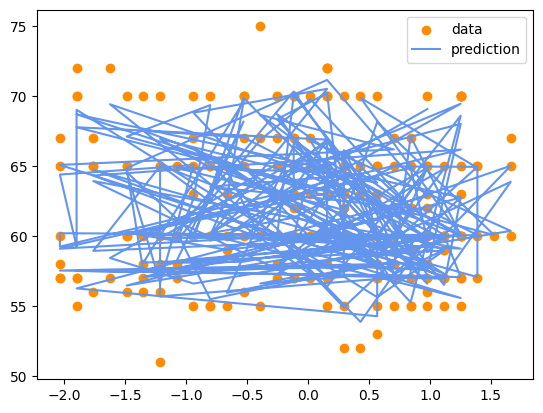

In [64]:
plt.scatter(X_train["Sleep efficiency"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Sleep efficiency"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [65]:
# регрессия эластик
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  0.2191
  R2: 0.9982
 Adjusted R2: 0.9978
 Cross Validated R2: 0.9982


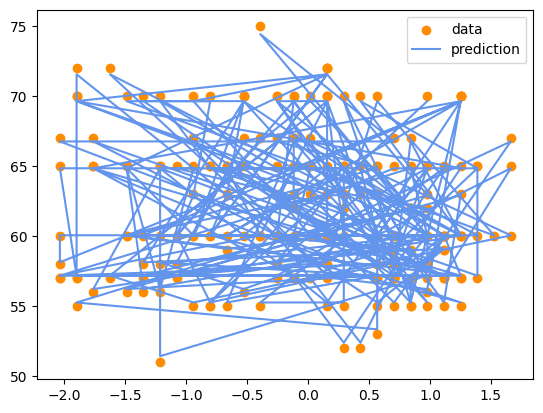

In [66]:
plt.scatter(X_train["Sleep efficiency"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Sleep efficiency"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()